# Fauzan Gauhar Khan [FA23-BCS-037]

________________________________________________________________________________________________________________________________________________________


# How We Solved It?

1. First, we fixed the DeprecationWarning, we imported imageio.v2 instead of image.io as instructed below in the warnings.
2. Importing our image, for some reason Jupyter was not picking up the images so instead of reference path, we gave it full path to the images which fixed our issue.
3. Another issue with the code was Jupyter was not printing or displaying my images due to outdated function imshow() instead of that I used plt.show() without any arguments in it and that fixed the issue.
4. Image structure was printed in (x, y, z) form, x being the height, y coloumn and z RGB color (3 means the image has all 3 colors)
5. Same case with the histogram printing, plt.show() was added at the last to fix the issue of printing the image.


________________________________________________________________________________________________________________________________________________________


# Final Conclusion
[[−1, 2, −1], [−1, 2, −1], [−1, 2, −1]] - VERTICAL EDGE DETECTION


[[−1, −1, −1], [2, 2, 2], [−1, −1, −1]] - HORIZONTAL EDGE DETECTION

# Basic image processing in Python 3

First of all we need to import misc module from scipy which has the builtin funcitons for opening images (now rplaced with imageio). 
Numpy is a numerical computing and linear algebra library which we use to process digital images as matrices. Matplotlib provies several methods for ploting which we will use for displaying images. 


In [3]:
#from scipy import misc (depricatd)
from imageio.v2 import imread
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# enables the inline mode for matplotlib so that it won't open another window for showing images.
%matplotlib inline
# this reads the given image and stores it as a matrix (numpy array)
im = imread("img1.jpg")
# this is a matplotlib function that displays a numpy array as an image.
plt.show()

In [5]:
print(type(im))
print(im.shape)
print(im)

<class 'numpy.ndarray'>
(400, 600, 3)
[[[255 162  85]
  [254 161  84]
  [253 160  83]
  ...
  [255 254 222]
  [255 254 222]
  [255 254 224]]

 [[253 162  92]
  [253 162  92]
  [255 164  94]
  ...
  [251 243 162]
  [251 242 163]
  [251 242 163]]

 [[238 149  89]
  [240 151  91]
  [242 153  93]
  ...
  [253 235 111]
  [254 235 114]
  [255 236 116]]

 ...

 [[ 24  33  48]
  [ 24  33  48]
  [ 24  33  48]
  ...
  [ 16  22  34]
  [ 16  22  34]
  [ 16  22  34]]

 [[ 24  33  48]
  [ 24  33  48]
  [ 24  33  48]
  ...
  [ 16  22  34]
  [ 16  22  34]
  [ 16  22  34]]

 [[ 24  33  48]
  [ 24  33  48]
  [ 24  33  48]
  ...
  [ 16  22  34]
  [ 16  22  34]
  [ 16  22  34]]]


In [6]:
print(im.shape)

(400, 600, 3)


In [7]:
print(im[0][0]) # 0 row, 0 col
type(im[0][0])
#np.int(np.average(im[0][0]))


[255 162  85]


numpy.ndarray

## RGB to Grayscale Conversion

There are many ways to convert RGB to Grayscale. Here’s we’ll do two of those, a simple Average and a Weighted Average.
Simple Average

This formula is very simple:
$$ i = \frac{r + g + b}{3} $$

In [8]:
def average(pixel):
    return (pixel[0] + pixel[1] + pixel[2]) / 3

#OR, even more simple, use numpy's average
#np.average(pixel)

Using this function to convert an image

In [9]:
print(im.shape[1])
np.zeros((3,4))

600


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
gray = np.zeros((im.shape[0], im.shape[1])) 
# initialize a new 2D numpy array

for row in range(len(im)):
   for col in range(len(im[row])):
        # gray[row][col] = average(im[row][col])
        gray[row][col] = np.average(im[row][col])


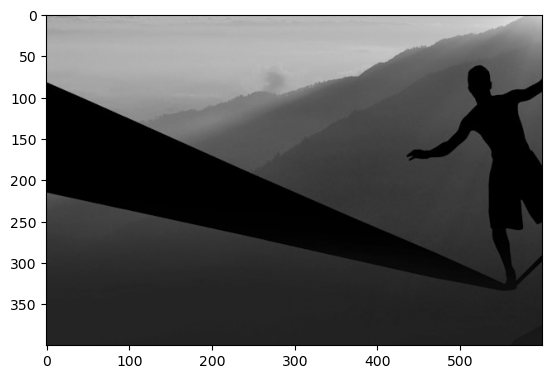

In [11]:
plt.imshow(gray, cmap='gray')
plt.show()

In [12]:
# incrasing pixel values by 25%

gray2 =gray * 2.25

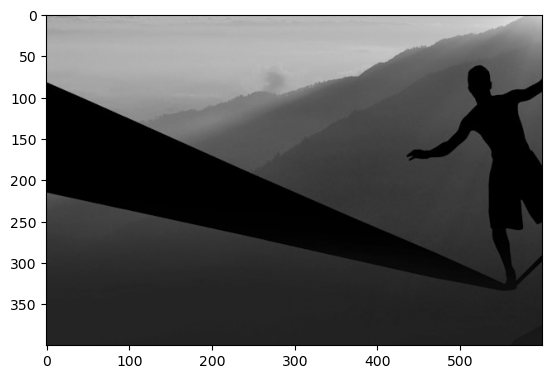

In [13]:
plt.imshow(gray2,cmap='gray')
plt.show()

In [14]:
im.shape

(400, 600, 3)

In [15]:
gray.shape

(400, 600)

# performing image inversion

$$ S(x,y) = 256 - R(x,y) $$

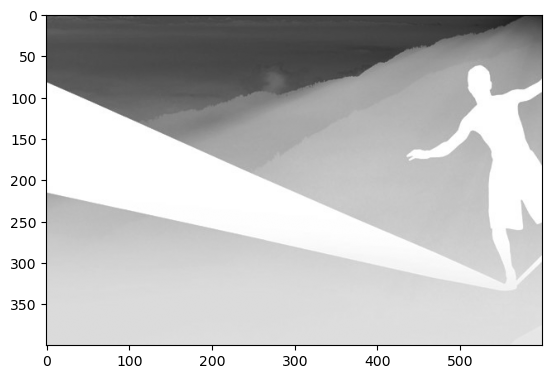

In [16]:
neg = 255 - gray
plt.imshow(neg,cmap="gray")
plt.show()

In [17]:
print(gray[0][0])
print(neg[0][0])


167.33333333333334
87.66666666666666


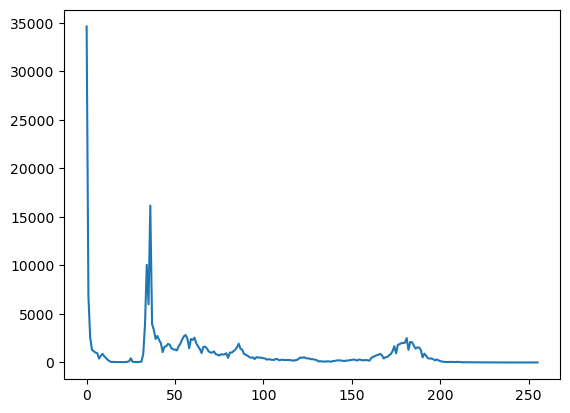

In [18]:
from matplotlib import pyplot as plt 
hist = np.histogram(gray,256)
plt.plot(hist[0])
plt.show()


[[-1 -1 -1]
 [ 2  2  2]
 [-1 -1 -1]]


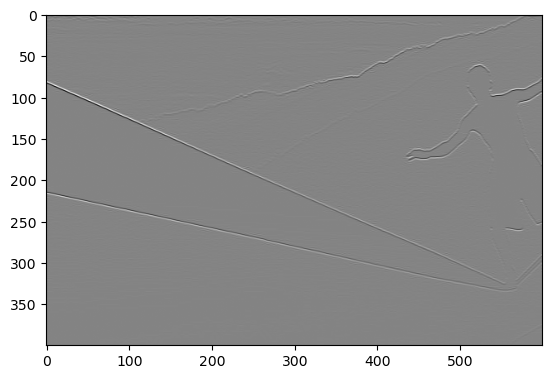

In [19]:
from scipy.ndimage import convolve
w = np.array([[-1, -1, -1],[2, 2, 2],[-1, -1 , -1]])
print(w)
b = convolve(gray, w)
plt.imshow(b,cmap='gray')
plt.show()

[[-1  2 -1]
 [-1  2 -1]
 [-1  2 -1]]


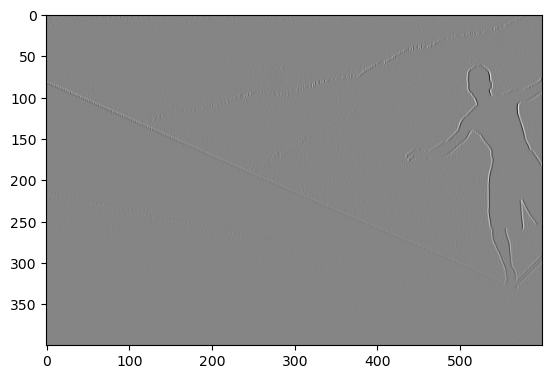

In [20]:
w2 = np.array([[-1, 2, -1],[-1, 2, -1],[-1, 2 , -1]])
print(w2)
c = convolve(gray, w2)
plt.imshow(c,cmap='gray')
plt.show()